# Overview plots
This notebook makes some useful plots for presentation/paper purposes. For example, a regime diagram.

In [74]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import h5py
from pylab import *
import scipy.integrate as integrate
#from cmocean import cm as cmo
import matplotlib.gridspec as gridspec
import matplotlib.ticker 
import scipy.stats as stats
import scipy.optimize as optimize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit

plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in greater
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: Ru

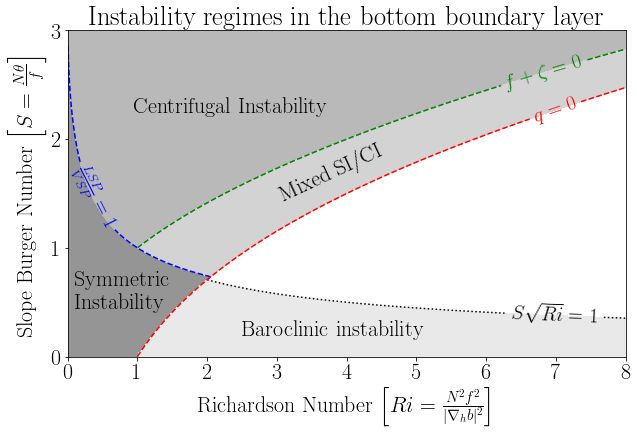

In [145]:

ns = 800*5
nri = 800*2
maxr = 8
maxs = 3**2
S = np.linspace(0, maxs, ns)
Ss = np.sqrt(S)
Ri =np.transpose(np.linspace(0, maxr, nri))
Rif = np.zeros((ns, nri))
Sf = np.zeros((ns, nri))
for i in range(0, ns):
    Rif[i,:] = np.linspace(0, maxr, nri)
for i in range(0, nri):
    Sf[:,i] = np.linspace(0, maxs, ns)
#Rif = np.outer(Ri, Ri)plt
delta = (Sf*Rif)**(1/2)
# alpha = np.sqrt(Rif)

Pr = .1
SICI = (1/delta)*(1-Pr*(1-delta/Rif))**(-1) # INVERSE DEFINITION FROM MS, IE VSP/LSP
BICI = delta
#CIBI = delta*(1+Rif)/(Rif) 
CCRIT = delta/Rif
SICRIT = Rif 


SICRIT = (1/Rif)*(1+delta)>1 
VSHS = (1/delta)*(1-Pr*(1-delta/Rif))**(-1) > 1
CCRIT = delta/Rif > 1
maskSI = np.nan*np.zeros((Rif.shape))
maskSI[VSHS&SICRIT] = 1
maskCI = np.nan*np.zeros((Rif.shape))
#VSHSn = not VSHS
maskCI[CCRIT& np.logical_not(VSHS)] = 1

maskMI = np.nan*np.zeros((Rif.shape))
maskMI[SICRIT& np.logical_not(VSHS)&np.logical_not(CCRIT)] = 1
maskPV = np.nan*np.zeros((Rif.shape))
maskPV[np.logical_not(SICRIT)] = 1

maskVS = np.nan*np.zeros((Rif.shape))
maskVS[SICRIT] = 1
#maskSI[maskSI!=1] = NaN

maskBI = np.nan*np.zeros((Rif.shape))
# maskBI[maskMI& alpha<1] = 1
maskBI[np.logical_and(maskPV==1, delta<1)] = 1
maskSIflip = ~np.isfinite(maskSI)
# maskSIflip = np.logical_and(Sf>1, Rif>1)

cl = 8
plt.figure(figsize=(10, 6))
plt.contourf(Ri, Ss, maskSI*4, np.linspace(0, cl, 10), cmap='Greys')
plt.contourf(Ri, Ss, maskCI*3, np.linspace(0,cl, 10), cmap='Greys')
plt.contourf(Ri, Ss, maskMI*2, np.linspace(0, cl, 10), cmap='Greys')
plt.contourf(Ri, Ss, maskBI*1, np.linspace(0, cl, 10), cmap='Greys')
ind = np.where(Ri>1)[0][0]
RVL = plt.contour(Ri[ind:], Ss,delta[:,ind:]/Rif[:,ind:]*(maskSIflip[:,ind:]) - 1, levels=[0], colors='green', linestyles='dashed') 
CL = plt.contour(Ri, Ss,delta*maskPV, levels=[1], colors='k', linestyles='dotted')
# plt.clabel(CL, inline=1, fontsize = 12, fmt='$\\alpha$ $=$ %1.0f', manual=mlocs)

ENL = plt.contour(Ri, Ss,SICI*maskVS, levels=[1], colors='b', linestyles='dashed')
PVL = plt.contour(Ri, Ss,(1/Rif)*(1+delta) -1 , levels=[0], colors='r', linestyles='dashed')
plt.clabel(PVL, inline=1, fontsize = 20, fmt='$q=$ %1.0f', manual = [(7, 2.25)])
plt.clabel(RVL, inline=1, fontsize = 20, fmt='$f + \zeta=$ %1.0f', manual = [(7, 2.25)])
plt.clabel(ENL, inline=1, fontsize = 20, fmt='$\\frac{LSP}{VSP}=$ %1.0f', manual = [(0.5, 1.5)])
plt.clabel(CL, inline=1, fontsize = 20, fmt='$S\sqrt{Ri}$ $=$ %1.0f', manual=[(7, 0.5)])

# plt.axhline(1e10, color='r',linestyle='dashed', label='$q = 0$')
# plt.axhline(1e10, color='g',linestyle='dashed', label='$f + \zeta = 0$')
# plt.axhline(1e10, color='k',linestyle='dotted', label='$S\sqrt{Ri} = 1$')
# plt.axhline(1e10, color='b',linestyle='dashed', label='$LSP/VSP = 1$')
# plt.ylim((0, np.max(Ss)))
# plt.legend(fontsize=16)
#plt.plot(1.25, 2.75, marker='x', color='k')
#plt.plot(0.5, 0.1, marker='x', color='k')
plt.xlabel('Richardson Number $\left[Ri = \\frac{N^2f^2}{|\\nabla_h b|^2}\\right]$')
plt.ylabel('Slope Burger Number $\left[S = \\frac{N\\theta}{f}\\right]$')
plt.title('Instability regimes in the bottom boundary layer')

plt.yticks([0, 1, 2, 3])
plt.annotate('Symmetric\n Instability',
             xy=(0.1, 0.45), xycoords='data', xytext=(+0, +0), 
             textcoords='offset points', fontsize=22)
plt.annotate(r'Centrifugal Instability',
             xy=(.95, 2.25), xycoords='data', xytext=(+0, +0), 
             textcoords='offset points', fontsize=22)
plt.annotate('Mixed SI/CI',
             xy=(3, 1.85), xycoords='data', xytext=(+0, +0), 
             textcoords='offset points', fontsize=22, rotation = 25)
plt.annotate('Baroclinic instability',
                 xy=(2.5, 0.2), xycoords='data', xytext=(+0, +0), 
                 textcoords='offset points', fontsize=22, ma='center')

plt.savefig('RegimeDiagramProposal.pdf', bbox_inches='tight')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less_equal
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


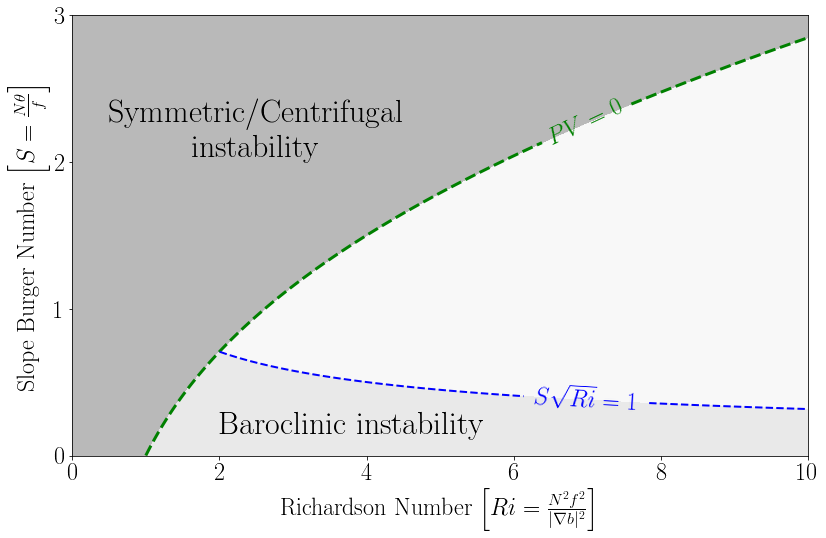

In [178]:
# SI/CI vs. BI wide plot
Ri = np.linspace(0, 10, 1000)
S = np.linspace(0, 3, 1000)
Rv, Sv = np.meshgrid(Ri, S)
alpha = Sv*np.sqrt(Rv)
small = False

if not small:
    plt.figure(figsize=(12,8))
else:
    plt.figure(figsize=(8,8))

PV = Sv*np.sqrt(Rv)/Rv + 1/Rv
maskSI = PV>1
maskBI = np.nan*np.zeros_like(Rv)
maskBI[np.logical_and(PV<=1, alpha<1)] = 1
# maskBI[np.logical_and(PV<=1, 1==1)] = 1

maskBIL = np.nan*np.zeros_like(Rv)
maskBIL[PV<=1] = 1
# maskBI = PV<=1
# maskBI[np.logical_not(maskBI)] = np.nan
cl = 8
plt.contourf(Rv, Sv, maskSI*3, np.linspace(0, cl, 10), cmap='Greys')
plt.contourf(Rv, Sv, maskBI*1, np.linspace(0, cl, 10), cmap='Greys')

# plt.contour(Rv, Sv, (1-Sv**2/(1+Sv**2))*Rv, [0, 1], colors='r')
# plt.contour(Rv, Sv, (Sv/(1+Sv)) + 1/Rv, [1], colors='r')
PVL = plt.contour(Rv, Sv, -1 + Sv*np.sqrt(Rv)/Rv + 1/Rv, [0], colors='g', linewidths=3, linestyles='dashed')
# plt.contour(Rv, Sv, alpha/Rv, [0.2], colors='b', linewidths=2, linestyles='dashed')
CL = plt.contour(Rv, Sv, alpha*maskBIL, [1], colors='b', linewidths=2, linestyles='dashed')
plt.clabel(CL, inline=1, fontsize = 24, fmt='$S\sqrt{Ri}$ $=$ %1.0f', manual=[(7, 0.5)])
plt.clabel(PVL, inline=1, fontsize = 24, fmt='$PV$ $=$ %1.0f', manual = [(7, 2.25)])
plt.yticks([0, 1, 2, 3])
# plt.contour(Rv, Sv, Sv*np.sqrt(Rv) + 1/Rv, [1], colors='g')

# plt.contour(Rv, Sv, np.sqrt(Sv*Rv)/Rv, [0, 1], colors='g')
# plt.contour(Rv, Sv, np.sqrt(Sv*Rv)/Rv, [0, 1], colors='g')
# plt.grid()
plt.xlabel('Richardson Number $\left[Ri = \\frac{N^2f^2}{|\\nabla b|^2}\\right]$')
plt.ylabel('Slope Burger Number $\left[S = \\frac{N\\theta}{f}\\right]$')

if small:
    plt.annotate('Symmetric/Centrifugal\n instability',
                 xy=(0.35, 2.25), xycoords='data', xytext=(+0, +0), 
                 textcoords='offset points', fontsize=32, ma='center')
    plt.annotate('Baroclinic instability',
                 xy=(1.75, 0.1), xycoords='data', xytext=(+0, +0), 
                 textcoords='offset points', fontsize=32, ma='center')
else:
    plt.annotate('Symmetric/Centrifugal\n instability',
                 xy=(0.5, 2.05), xycoords='data', xytext=(+0, +0), 
                 textcoords='offset points', fontsize=32, ma='center')
    plt.annotate('Baroclinic instability',
                 xy=(2., 0.15), xycoords='data', xytext=(+0, +0), 
                 textcoords='offset points', fontsize=32, ma='center')
plt.tight_layout()
plt.savefig('RegimeDiagram_large.eps', bbox_inches='tight', pad_inches=0.1)

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255,
       256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268,
       269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 28

Text(0,0.5,'Ratio of boundary layer to\n interior stratification $\\left[\\frac{N^2}{N_o^2}\\right]$')

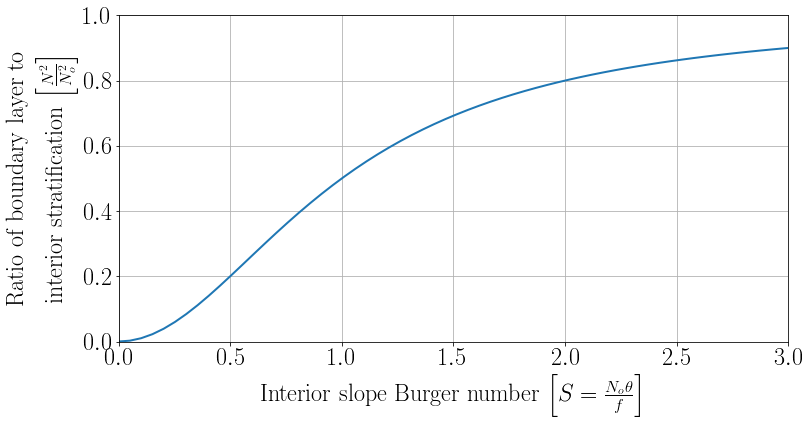

In [162]:
# Make N^2/N_o plot
# From Allen and Newberger, N^2_BL = No^2*(1-gamma)
# Therefore N^2_BL/N^2_o = S^2/(1+S^2)

S = np.linspace(0, 5, 100)
plt.figure(figsize=(12, 6))
plt.plot(S, S**2/(1+S**2), linewidth=2)

plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 3)
plt.xlabel('Interior slope Burger number $\left[S = \\frac{N_o\\theta}{f}\\right]$')
plt.ylabel('Ratio of boundary layer to\n interior stratification $\left[\\frac{N^2}{N_o^2}\\right]$')